# Example for a three link revolute robot

In [34]:
import numpy as np
import matplotlib.pyplot as plt

## Create a path for the robot to follow

In [35]:
from ppr.path import TrajectoryPt, TolerancedNumber

In [36]:
# create tolerances for x-position and orientation
dx    = TolerancedNumber(1, 0.9, 1.1, samples=3)
angle = TolerancedNumber(0.0, -0.5, 0.5, samples=5)

# create a list with path points
path = []
n_path = 12
for i in range(n_path):
    yi = 0.7 + i * 0.6 / n_path
    path.append(TrajectoryPt([dx, yi, angle]))

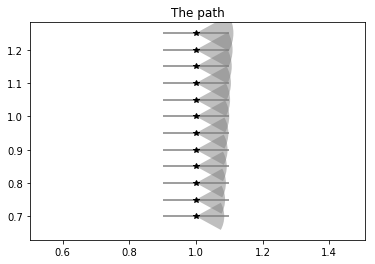

In [37]:
fig1, ax1 = plt.subplots()
plt.title("The path")
ax1.axis('equal')
for tp in path: tp.plot(ax1)
plt.show()

## Create a robot to follow the path

In [38]:
from ppr.robot import Robot_3R

In [39]:
# create a robot with link lengths 1, 1 and 0.5
robot1 = Robot_3R([1, 1, 0.5])

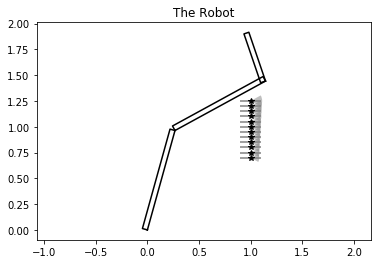

In [40]:
fig2, ax2 = plt.subplots()
plt.title("The Robot")
ax2.axis('equal')
robot1.plot(ax2, [1.3, -0.8, 1.4], 'k')
for tp in path: tp.plot(ax2)
plt.show()

## Create rectangle collision objects around the robot

In [41]:
from ppr.geometry import Rectangle

In [42]:
sc1 = [Rectangle(0.2, 0.4, 0.1, 0.2, -0.3),
       Rectangle(0.2, 0.8, 0.1, 0.5, 0.2),
       Rectangle(0.5, 1.3, 0.2, 0.3, -0.1)]

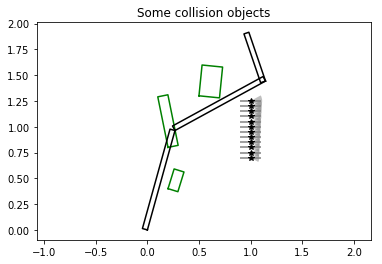

In [43]:
fig3, ax3 = plt.subplots()
plt.title("Some collision objects")
ax3.axis('equal')
for r in sc1: r.plot(ax3, 'g')
for tp in path: tp.plot(ax3)
robot1.plot(ax3, [1.3, -0.8, 1.4], 'k')
plt.show()

# Sampling based motion planning

## Now discretise the problem
The tolerenced trajectory points are converted to a list of poses.
Then for all these poses the inverse kinematics are solved.

In [44]:
from ppr.path import cart_to_joint
path_js = cart_to_joint(robot1, path, check_collision=True, scene=sc1)

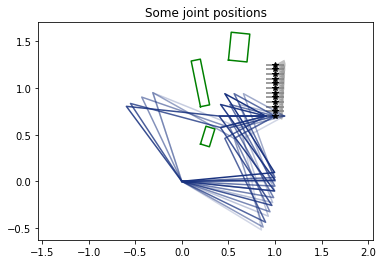

In [45]:
# plot the different joint solution for the first trajectory point
fig4, ax4 = plt.subplots()
plt.title("Some joint positions")
ax4.axis('equal')
robot1.plot_path_kinematics(ax4, path_js[0])
for r in sc1: r.plot(ax4, 'g')
for tp in path: tp.plot(ax4)
plt.show()

## Graph search

In [46]:
from ppr.path import get_shortest_path

In [47]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[0 1 1 2 2 2 3 2 2 1 1 0]
True


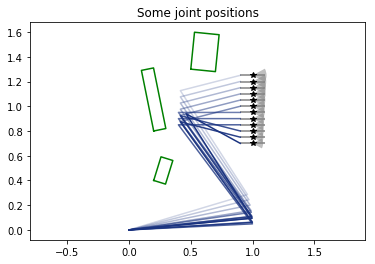

In [48]:
fig5, ax5 = plt.subplots()
plt.title("Some joint positions")
ax5.axis('equal')
robot1.plot_path_kinematics(ax5, sol['path'])
for r in sc1: r.plot(ax5, 'g')
for tp in path: tp.plot(ax5)
plt.show()